# Fantomanalysis: Analyzing dustgrowth simulations with python

In [1]:
import fantomanalysis as fa
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
# access to some attributes
fa.au
fa.msol
fa.yr

31557600.0

In [3]:
fa.read?

## 1. Read particle distribution

The first and simplest task you might want to do is transcribe your particle distribution into a DataFrame object, which is what the read function does.

In [4]:
# let's take this dump as a reference for this tutorial
file = "30V15H_00200.ascii"

In [5]:
# the first function simply reads the dump and puts it into a DataFrame
time, data = fa.read(file=file)

In [6]:
# the DataFrame columns can be displayed with
data.columns

Index(['x', 'y', 'z', 'm', 'h', 'rho', 'dustfrac', 'grainsize', 'graindens',
       'vrelvf', 'cs', 'rhogas', 'st', 'dv', 'vx', 'vy', 'vz', 'divv', 'dt',
       'type', 'r', 'vr'],
      dtype='object')

In [7]:
# in particular the type of the particles can be a good way of segregating them
data.type

0          1
1          1
2          1
3          1
4          1
5          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
26         1
27         1
28         1
29         1
30         1
31         1
          ..
1199967    8
1199968    8
1199969    8
1199970    8
1199971    8
1199972    8
1199973    8
1199974    8
1199975    8
1199976    8
1199977    8
1199978    8
1199979    8
1199980    8
1199981    8
1199982    8
1199983    8
1199984    8
1199985    8
1199986    8
1199987    8
1199988    8
1199989    8
1199990    8
1199992    8
1199993    8
1199994    8
1199995    8
1199996    8
1199997    8
Name: type, Length: 1062385, dtype: int64

In [8]:
# we can select of subset of the data, for example only dust particles
igas = 1
idust = 8
dust = data[data.type==idust]

In [9]:
dust

,x,y,z,m,h,rho,dustfrac,grainsize,graindens,vrelvf,...,st,dv,vx,vy,vz,divv,dt,type,r,vr
999999,74.591476,62.436958,-0.011025,9.945499e+20,1.442142,9.903935e-14,0.0,0.002303,999.999949,1.028875,...,0.622736,11.527563,-0.065253,0.077218,-9.535805e-05,0.000216,25.506554,8,97.274159,-14.109590
1000000,-60.819897,29.572224,0.020707,9.945499e+20,0.691359,8.989213e-13,0.0,0.001444,999.999949,1.015881,...,0.243230,9.039894,-0.052997,-0.109220,-1.593327e-04,0.001165,12.753277,8,67.628221,-2.927290
1000002,-20.205992,48.286118,-0.109761,9.945499e+20,0.180225,5.074456e-11,0.0,0.005109,999.999949,1.043343,...,0.151968,11.675282,-0.127536,-0.053446,-5.967804e-05,0.002819,1.594160,8,52.343398,-2.112772
1000003,-30.818241,-35.117359,-0.163705,9.945499e+20,0.937540,3.604642e-13,0.0,0.000205,999.999949,0.854408,...,0.075543,8.839098,0.109788,-0.096601,2.065048e-04,0.000371,6.376638,8,46.722509,5.653802
1000005,64.827568,-15.969244,-0.371388,9.945499e+20,0.738407,7.378105e-13,0.0,0.001476,999.999949,0.960126,...,0.237887,4.493635,0.029247,0.118545,7.151228e-05,-0.000222,12.753277,8,66.765488,1.319494
1000006,-40.073677,-35.288349,-0.105066,9.945499e+20,0.204945,3.450820e-11,0.0,0.003973,999.999949,0.966133,...,0.159113,7.462380,0.090456,-0.102846,8.904308e-05,0.000382,3.188319,8,53.396322,2.437955
1000007,-153.371320,-209.419740,-0.888332,9.945499e+20,4.585153,3.081558e-15,0.0,0.000068,999.999949,0.394637,...,0.071595,2.865331,0.049710,-0.036444,1.877917e-05,-0.000018,25.506554,8,259.575402,0.920287
1000008,50.219589,-7.043098,-0.144321,9.945499e+20,0.495471,2.442182e-12,0.0,0.000651,999.999949,1.062422,...,0.125022,13.879925,0.019569,0.139253,-3.658992e-04,-0.000500,3.188319,8,50.711067,1.145188
1000009,-60.701916,116.154560,0.213695,9.945499e+20,1.621045,6.973430e-14,0.0,0.001354,999.999949,0.905952,...,0.476265,10.443192,-0.077032,-0.040602,-1.057199e-05,0.000238,51.013107,8,131.059545,-9.117193
1000010,124.212310,-220.864270,0.058410,9.945499e+20,4.905641,2.516197e-15,0.0,0.000087,999.999949,0.431407,...,0.088524,3.062684,0.054382,0.030704,3.087068e-05,-0.000035,25.506554,8,253.396377,-3.131228


Text(0.5, 1.0, 't = 51 kyr')

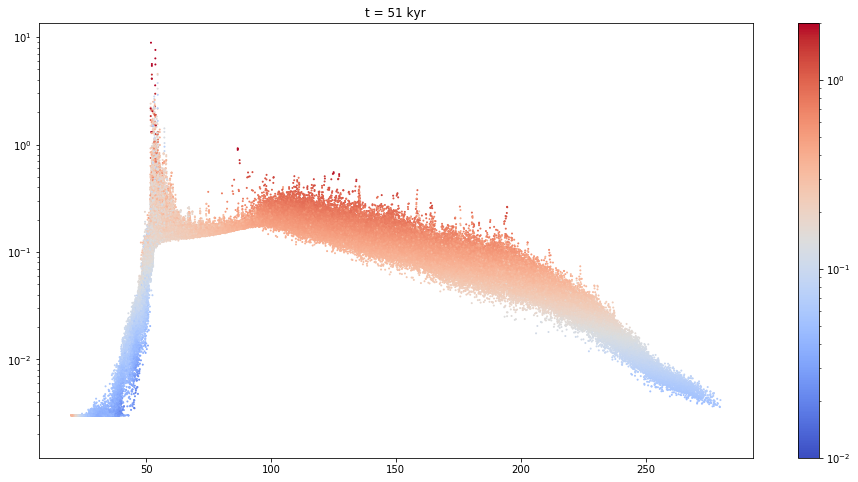

In [10]:
# creating fig structure
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
# choosing colorbar
cmap = matplotlib.cm.get_cmap("coolwarm")
# choosing normalization
norm = matplotlib.colors.LogNorm(vmin=1e-2, vmax=2)
# plot data as scatter points
sc = ax.scatter(dust.r, dust.grainsize*100, c=dust.st, s=1, cmap=cmap, norm=norm)
# set yscale log
ax.set_yscale("log")
# plot colorbar
cb = fig.colorbar(sc)
# add title printing time in kyr
plt.title(f"t = {int(time/1000)} kyr")

## 2. Flag dust particles

Another nice feature is to flag dust particles using their distance to the star, their altitude and/or their physical size.

In [11]:
fa.flag_dust?

In [12]:
# obtain list of indexes fulfiling certain conditions
index1 = fa.flag_dust(file=file, radii=(100,), tolr=0.2, one_per_condition=False)
index2 = fa.flag_dust(file=file, radii=(100,), tolr=0.2, one_per_condition=False, by_size=True, sizes=(3e-3,), tols=0.1)

particles selected:

r ---- z ---- size 

999999      97.274159
1000013    105.392031
1000015    103.415482
1000016     87.202908
1000023    114.154609
1000066    116.668682
1000072     90.439437
1000083    112.454823
1000085     84.551714
1000088     80.135932
1000093    100.464879
1000098     97.009226
1000100    107.606905
1000108     90.315970
1000138     87.479739
1000142     99.863557
1000147     87.722848
1000166    116.388627
1000181    107.268700
1000188    115.655281
1000197     96.191399
1000200    103.798710
1000203     85.493717
1000210     94.189874
1000211    118.529126
1000225     94.007346
1000230     85.910816
1000239     81.043475
1000242    118.185791
1000258     97.582101
              ...    
1199831     85.400873
1199834     88.989785
1199845     81.206422
1199854    117.621922
1199873     81.283277
1199889     96.625668
1199892    102.167725
1199893     95.844411
1199894    101.668169
1199897     93.245780
1199900     91.326542
1199903     98.924937
1199905     

In [13]:
# create subset of particle distribution using the previous indexes
filter1 = dust[dust.index.isin(index1[0])]
filter2 = dust[dust.index.isin(index2[0])]

Text(80, 100, 'by_r & by_size')

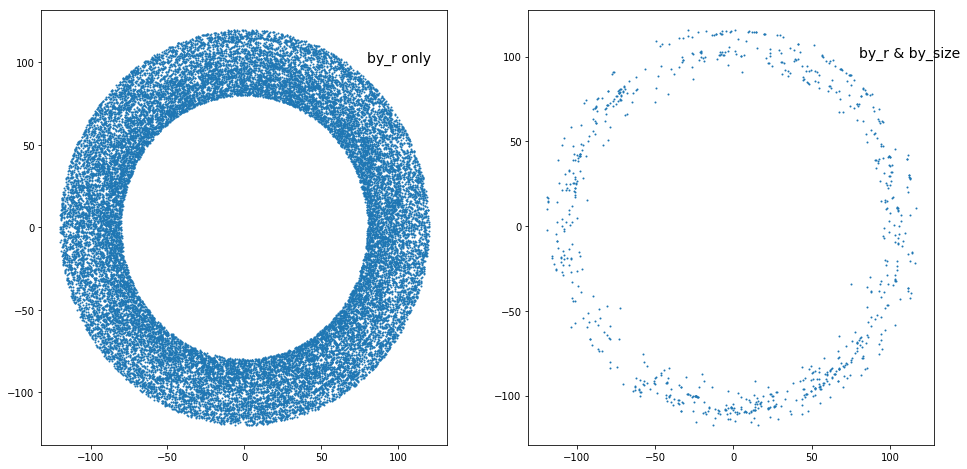

In [14]:
# visualizing the particles distrib.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(filter1.x, filter1.y, s=1)
ax2.scatter(filter2.x, filter2.y, s=1)
ax1.annotate("by_r only", xy=(80, 100), size=14)
ax2.annotate("by_r & by_size", xy=(80, 100), size=14)

## 3. Profiles

The third and probably most important feature is being able to make profiles of the data along r, z, s or St.

In [15]:
fa.bins?

In [16]:
# first, let's bin by the distance to the star only
time, pror = fa.bins(file=file, rbins=150)

In [17]:
pror.columns

Index(['r', 'vgr', 'vdr', 'Hg', 'Hd', 'hg', 'hd', 'sigmag', 'sigmad', 'rhog',
       'rhog_d', 'rhod', 'gsize', 'vrelvfrag', 'dv', 'st', 'cs'],
      dtype='object')

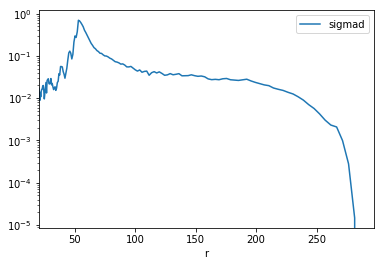

In [18]:
# we can plot the dust surface density profile for instance
pror.plot("r", "sigmad")
plt.yscale("log")

In [19]:
# defining and adding a new column to the profile DataFrame is also doable
pror.loc[:,"Pg"] = pror.cs**2*pror.rhog

In [20]:
pror.columns

Index(['r', 'vgr', 'vdr', 'Hg', 'Hd', 'hg', 'hd', 'sigmag', 'sigmad', 'rhog',
       'rhog_d', 'rhod', 'gsize', 'vrelvfrag', 'dv', 'st', 'cs', 'Pg'],
      dtype='object')

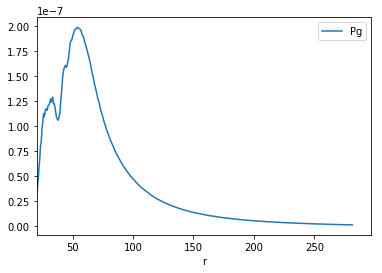

In [21]:
# then the pressure profile can be admired (since it is so beautiful)
pror.plot("r", "Pg")

In [22]:
fa.bins?

In [23]:
# we can also bin by other means, like by z, size or Stokes number
time, pror, prost = fa.bins(file=file, binst=True, sbins=15, rbins=150)

In [24]:
# defining the scale height of the dust disc given by Fromang & Paploizou 2006 for example...
def fromang(st, alpha, Hg):
    return Hg*np.sqrt(alpha/st)
st = np.logspace(-2, 1, 300)

In [25]:
prost.columns

Index(['st', 'npart', 'vdr', 'hd', 'rhod', 'vrelvfrag', 'Hd'], dtype='object')

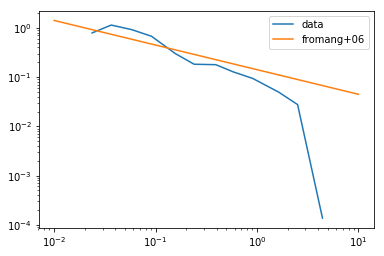

In [26]:
# we can qualitatively compare the settling that occured in our disc with their law: it pretty much work!
plt.plot(prost.st, prost.Hd, label="data")
plt.plot(st, fromang(st, 5e-3, Hg=2), label="fromang+06")
plt.yscale("log")
plt.xscale("log")
plt.legend()

## 4. Follow particles

Finally, the Lagrangien nature of the code makes particle tracking extremely easy and insightful. To do that, the follow function requires a list of files to loop over and the indexes of the particles you might want to follow, i.e. with the indexes that flag_dust provided you.

In [27]:
fa.follow?

In [28]:
# we want to follow one particle at each of these radii
radii = (50, 100, 150)

In [29]:
# each index here represent one particle
indexes = fa.flag_dust(file=file, by_r=True, tolr=0.01, radii=radii)

particles selected:

r ---- z ---- size 

50.06427386717028 0.34241641 0.000565258296756929
100.41456740254034 0.0088247238 0.0020990289512618837
148.76332299528983 0.34188011 0.0010824559472713362


In [30]:
# defining the list of files to loop over...
numbers = ["%05d" % x for x in range(0, 201, 40)]
files = ["30V15H_" + n + ".ascii" for n in numbers]
files

['30V15H_00000.ascii',
 '30V15H_00040.ascii',
 '30V15H_00080.ascii',
 '30V15H_00120.ascii',
 '30V15H_00160.ascii',
 '30V15H_00200.ascii']

In [31]:
# the follow function is pretty straightforward and returns a "cube of data", i.e. a numpy array of Dataframe
particles = fa.follow(files, indexes)

--> 30V15H_00000.ascii done.
--> 30V15H_00040.ascii done.
--> 30V15H_00080.ascii done.
--> 30V15H_00120.ascii done.
--> 30V15H_00160.ascii done.
--> 30V15H_00200.ascii done.


In [32]:
particles[0].columns

Index(['x', 'y', 'z', 'm', 'h', 'rho', 'dustfrac', 'grainsize', 'graindens',
       'vrelvf', 'cs', 'rhogas', 'st', 'dv', 'vx', 'vy', 'vz', 'divv', 'dt',
       'type', 'r', 'vr', 'time'],
      dtype='object')

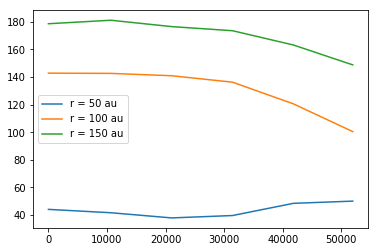

In [34]:
# Plotting all these particles is then pretty easy and just requires to loop over the len of the "particles" structure
for i in range(len(radii)):
    plt.plot(particles[i].time, particles[i].r, label="r = " + str(radii[i]) + " au")
plt.legend()